<!--NOTEBOOK_HEADER-->*This notebook contains material for CBE 20258 Numerical and Statistical Analysis taught at the University of Notre Dame. (c) Professors Alexander Dowling, Ryan McClarren, and Yamil Colón. This collection of notebooks [cbe-xx258](https://ndcbe.github.io/cbe-xx258) is available [on Github](https://github.com/ndcbe/cbe-xx258).*


<!--NAVIGATION-->
< [1.7 Visualization with matplotlib](https://ndcbe.github.io/cbe-xx258/01.07-Matplotlib.html) | [Contents](toc.html) | [1.9 Functions as Arguments](https://ndcbe.github.io/cbe-xx258/01.09-Functions-as-Arguments.html) ><p><a href="https://colab.research.google.com/github/ndcbe/cbe-xx258/blob/master/docs/01.08-Pandas.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe-xx258/01.08-Pandas.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

In [ ]:
# IMPORT DATA FILES USED BY THIS NOTEBOOK
import os,  requests

file_links = [("data/Stock_Data.csv", "https://ndcbe.github.io/cbe-xx258/data/Stock_Data.csv"),
    ("data/table1-1.csv", "https://ndcbe.github.io/cbe-xx258/data/table1-1.csv"),
    ("data/table1-2.csv", "https://ndcbe.github.io/cbe-xx258/data/table1-2.csv")]

# This cell has been added by nbpages. Run this cell to download data files required for this notebook.

for filepath, fileurl in file_links:
    stem, filename = os.path.split(filepath)
    if stem:
        if not os.path.exists(stem):
            os.mkdir(stem)
    if not os.path.isfile(filepath):
        with open(filepath, 'wb') as f:
            response = requests.get(fileurl)
            f.write(response.content)


# 1.8 Manipulating Data with Pandas

## 1.8.1 Learning Objectives
After studying this notebook, completing the activities, and asking questions in class, you should be able to:

* Import and analyze data using Pandas
 * Read data from a text file
 * Loop over columns in Pandas array
 * Compute descriptive statistics with Pandas
 * Plot data stored in a Pandas dataframe

## 1.8.2 Working with Data Using Pandas

On Sakai, you'll find `Datasets-All-Examples-Navidi.zip`. This file, which I downloaded from [the publisher](http://highered.mheducation.com/sites/0073401331/student_view0/data_sets.html), contains all of the data for the examples and tables in our textbook. We'll use many of these datasets to illustrate key concepts in class.

Let's start with Tables 1.1 and 1.2 (pg. 21), which give **particulate matter (PM) emissions in g/gal** for 138 and 62 vehicles at low and high altitudes, respectively. Please take a moment to get out your textbook and glance at the tables.

Now let's load the data into Python. In this class, we will use `Pandas`, which is a super popular and easy to use package/library/module for organizing and manipulating data. Here is a highly recommended [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) getting started tutorial.

In [64]:
# load the Pandas library, give nickname 'pd'
import pandas as pd

### 1.8.2.1 Loading and Inspecting Data

The code below reads in the first text file.

In [65]:
low = pd.read_csv('table1-1.csv')

This creates a Pandas **dataframe**, which is stored in the variable `low`. We can easily print its contents to the screen.

In [66]:
print(low)

        PM
0     1.50
1     0.87
2     1.12
3     1.25
4     3.46
5     1.11
6     1.12
7     0.88
8     1.29
9     0.94
10    0.64
11    1.31
12    2.49
13    1.48
14    1.06
15    1.11
16    2.15
17    0.86
18    1.81
19    1.47
20    1.24
21    1.63
22    2.14
23    6.64
24    4.04
25    2.48
26    2.98
27    7.39
28    2.66
29   11.00
..     ...
108   4.93
109   6.05
110   5.82
111  10.19
112   3.62
113   2.67
114   2.75
115   8.92
116   9.93
117   6.96
118   5.78
119   9.14
120  10.63
121   8.23
122   6.83
123   5.60
124   5.41
125   6.70
126   5.93
127   4.51
128   9.04
129   7.71
130   7.21
131   4.67
132   4.49
133   4.63
134   2.80
135   2.16
136   2.97
137   3.90

[138 rows x 1 columns]


In [67]:
len(low)

138

The first row (vehicle) is numbered 0, which is perhaps not a surprise. We see there are 138 rows in the dataset, which matches what we expect: data for 138 vehicles at low altitude.

The output above is ugly. We can use the `.head()` and `.tail()` commands to look at only the first and last five entries.

In [68]:
low.head()

,PM
0,1.50
1,0.87
2,1.12
3,1.25
4,3.46


In [69]:
low.tail()

,PM
133,4.63
134,2.80
135,2.16
136,2.97
137,3.90


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Load the high altitude data, which is stored in <tt>table1-2.csv</tt> into the Pandas dataframe <tt>high</tt>. Verify there are 62 rows. Use the head command to see the first few rows.
</div>

In [70]:
# YOUR SOLUTION HERE

Number of rows =  62


,PM
0,7.59
1,6.28
2,6.07
3,5.23
4,5.54


### 1.8.2.2 Computing Summary Statistics

Our example so far has only one column of data, named `PM`. We can access this column two ways:

In [72]:
low['PM']

0       1.50
1       0.87
2       1.12
3       1.25
4       3.46
5       1.11
6       1.12
7       0.88
8       1.29
9       0.94
10      0.64
11      1.31
12      2.49
13      1.48
14      1.06
15      1.11
16      2.15
17      0.86
18      1.81
19      1.47
20      1.24
21      1.63
22      2.14
23      6.64
24      4.04
25      2.48
26      2.98
27      7.39
28      2.66
29     11.00
       ...  
108     4.93
109     6.05
110     5.82
111    10.19
112     3.62
113     2.67
114     2.75
115     8.92
116     9.93
117     6.96
118     5.78
119     9.14
120    10.63
121     8.23
122     6.83
123     5.60
124     5.41
125     6.70
126     5.93
127     4.51
128     9.04
129     7.71
130     7.21
131     4.67
132     4.49
133     4.63
134     2.80
135     2.16
136     2.97
137     3.90
Name: PM, Length: 138, dtype: float64

In [73]:
low.PM

0       1.50
1       0.87
2       1.12
3       1.25
4       3.46
5       1.11
6       1.12
7       0.88
8       1.29
9       0.94
10      0.64
11      1.31
12      2.49
13      1.48
14      1.06
15      1.11
16      2.15
17      0.86
18      1.81
19      1.47
20      1.24
21      1.63
22      2.14
23      6.64
24      4.04
25      2.48
26      2.98
27      7.39
28      2.66
29     11.00
       ...  
108     4.93
109     6.05
110     5.82
111    10.19
112     3.62
113     2.67
114     2.75
115     8.92
116     9.93
117     6.96
118     5.78
119     9.14
120    10.63
121     8.23
122     6.83
123     5.60
124     5.41
125     6.70
126     5.93
127     4.51
128     9.04
129     7.71
130     7.21
131     4.67
132     4.49
133     4.63
134     2.80
135     2.16
136     2.97
137     3.90
Name: PM, Length: 138, dtype: float64

Pandas also makes it extremely easy to compute summary statistics and perform exploratory data analysis.

In [74]:
low.PM.describe()

count    138.000000
mean       3.714565
std        2.558040
min        0.250000
25%        1.472500
50%        3.180000
75%        5.265000
max       11.230000
Name: PM, dtype: float64

We will mathematically define the mean (a.k.a. average), standard deviation (std), minimum (min), maximum (max), and 25%-, 50%-, and 75%-ile (percentile) later this semester. The 50%-ile is also know as the median. Half of the observations are above the median and half are below.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Compute the mean (average) and median (50%-ile) for high altitude data. Store the results in Python variables <tt>high_average</tt> and <tt>high_median</tt>.
</div>

In [75]:
# YOUR SOLUTION HERE

count    62.000000
mean      6.596452
std       4.518998
min       1.110000
25%       3.487500
50%       5.750000
75%       7.755000
max      23.380000
Name: PM, dtype: float64


### 1.8.2.3 Combining Pandas and Matplotlib

Together, Pandas and Matplotlib make it easy to quickly visualize a dataset. The code below creates a histogram.

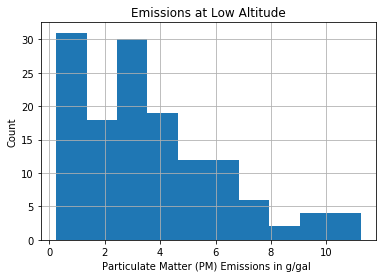

In [77]:
plt.hist(low.PM)
plt.xlabel("Particulate Matter (PM) Emissions in g/gal ")
plt.ylabel("Count")
plt.title("Emissions at Low Altitude")
plt.grid(True)
plt.show()

Each bin of the histogram shows the count (number) of vehicle with emissions between the left and right bound of the bin. For example, the third bin from the left shows that there are approximate 30 vehicles in the dataset with emissions between 2.2 and 3.8 g/gal.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Create a histogram for the high altitude data. Then determine the approximate number of vehicles with emissions between 0 and 3 g/gal. Store your answer in <tt>high_count</tt>. The upper limit of 3 g/gal is approximate. We want you to make a plot and interpret it.
</div>

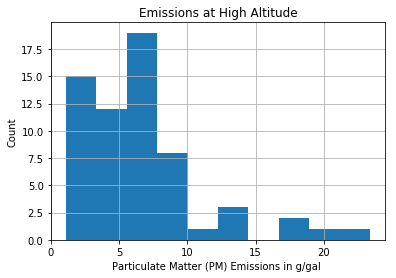

In [78]:
# YOUR SOLUTION HERE

## 1.8.3 Investment Strategies

We will spend one-third to one-half of Class 3 working on an example to leverage our new Python skills.

The CSV (Comma Seperated Value) file `Stock_Data.csv` is the historical daily adjusted closing prices for five index funds:

| Symbol | Name |
|-|-|
| GSPC | S&P 500 | 
| DJI | Dow Jones Industrial Average | 
| IXIC | NASDAQ Composite | 
| RUT | Russell 2000 |
| VIX | CBOE Volatility Index |

### 1.8.3.1 Getting Started

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Load the data into a Pandas dataframe named <tt>stocks</tt>. Then inspect the first 5 rows.
</div>

In [80]:
# YOUR SOLUTION HERE

,DJI,GSPC,IXIC,RUT,VIX
0,14447.75000,1551.689941,3235.300049,945.849976,13.74
1,14559.65039,1563.770020,3252.479980,949.820007,12.77
2,14526.16016,1562.849976,3256.520020,950.239990,13.15
3,14578.54004,1569.189941,3267.520020,951.539978,12.70
4,14572.84961,1562.170044,3239.169922,938.789978,13.58


We can loop over the column names of the dataframe:

In [82]:
for c in stocks.columns:
    print("The mean price of",c,"is",stocks[c].mean(),"dollars.")

The mean price of DJI is 18308.909006274822 dollars.
The mean price of GSPC is 2090.507513849881 dollars.
The mean price of IXIC is 4998.311674694996 dollars.
The mean price of RUT is 1220.7430421429708 dollars.
The mean price of VIX is 14.550937264495634 dollars.


This is extremely powerful. Let's use a for loop to plot the price of each index fund relative to the first day on a single plot.

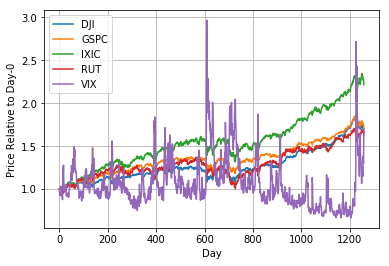

In [83]:
for c in stocks.columns:
    plt.plot(stocks[c] / stocks[c][0],label=c)

plt.xlabel("Day")
plt.ylabel("Price Relative to Day-0")
plt.grid(True)
plt.legend()
plt.show()

### 1.8.3.2 Portfolio Calculator

We want to create a compute program (function) that does the following:
* Takes these historical prices, an initial investment amount, and daily investment amount as inputs.
* On the first day in the dataset, splits the initial investment amount evenly among each of the index funds. Computes and records the number of shares purchased. Also records the value of the portfolio.
* On the remain days, splits the daily investment amount evenly among each of the index funds. Computes and records the number of shares at the end of the day. Also records the value of the portfolio using the new prices.
* After considering each day, plots the value of the portolio versus time.
* Returns the portolio history which includes the number of shares and value for each day.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, write pseudocode for this computer program.
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, use your pseudocode to complete the function below.
</div>

In [84]:
def portfolio(stock_data,initial_investment,daily_investment):
    ''' Compute and plot portfolio value
    
    Assumptions:
        We invest evenly across all available index funds
    
    Arguments:
        stock_data: Pandas dataframe containing historical stock prices
        initial_investment: dollars invested at the start of our portfolio (float)
        daily_investment: dollars invested at the end of each day (float)
        
    Returns:
        portfolio: Pandas dataframe containing the number of shares of each fund 
            and the value of the portfolio
            
    Also:
        Creates a (well labeled) plot of portfolio value versus time
    
    '''
    
    # determine the numbers of stocks
    n = len(stock_data.columns)
    
    ### Create a dataframe to store the results
    
    # Extract the names of the columns of 'stock_data', convert to list
    c = stock_data.columns.values.tolist()
    
    # Add 'Value' to the list
    c.append("Value")
    
    # Create new dataframe with the name number of rows as 'stock_data',
    # the same columns as 'stock_data' plus 'Value', and filled with 0.0
    portfolio = pd.DataFrame(0.0, index=range(len(stock_data)), columns=c)
    
    # YOUR SOLUTION HERE
    
    return portfolio

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Which is better? a) Invest \$2000 on the first day and \$0 each subsequent day or b) Invest \$500 on the first day and \$1.5 each subsequent day?
</div>

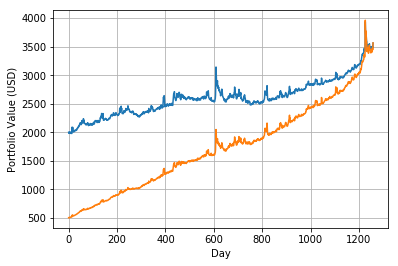

In [85]:
# YOUR SOLUTION HERE

**Discuss in a few sentences**:

<!--NAVIGATION-->
< [1.7 Visualization with matplotlib](https://ndcbe.github.io/cbe-xx258/01.07-Matplotlib.html) | [Contents](toc.html) | [1.9 Functions as Arguments](https://ndcbe.github.io/cbe-xx258/01.09-Functions-as-Arguments.html) ><p><a href="https://colab.research.google.com/github/ndcbe/cbe-xx258/blob/master/docs/01.08-Pandas.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe-xx258/01.08-Pandas.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>